In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
from pathlib import Path
from fastai.vision import *
from fastai.metrics import error_rate

In [12]:
path = untar_data('https://www.kaggle.com/techsash/waste-classification-data', <destination>)

SyntaxError: invalid syntax (<ipython-input-12-2101f15f583c>, line 1)

In [13]:
path = Path('/Users/anas/Desktop/waste-classification-data/DATASET'); 
path

PosixPath('/Users/anas/Desktop/waste-classification-data/DATASET')

In [14]:
pathTest = path/'TEST'
pathTrain = path/'TRAIN'
pathTest.ls()

[PosixPath('/Users/anas/Desktop/waste-classification-data/DATASET/TEST/.DS_Store'),
 PosixPath('/Users/anas/Desktop/waste-classification-data/DATASET/TEST/R'),
 PosixPath('/Users/anas/Desktop/waste-classification-data/DATASET/TEST/O')]

In [15]:
numberOfFiles = (pathTest/'O').ls()
numberOfFiles[:5]

[PosixPath('/Users/anas/Desktop/waste-classification-data/DATASET/TEST/O/O_13179.jpg'),
 PosixPath('/Users/anas/Desktop/waste-classification-data/DATASET/TEST/O/O_13145.jpg'),
 PosixPath('/Users/anas/Desktop/waste-classification-data/DATASET/TEST/O/O_13623.jpg'),
 PosixPath('/Users/anas/Desktop/waste-classification-data/DATASET/TEST/O/O_13637.jpg'),
 PosixPath('/Users/anas/Desktop/waste-classification-data/DATASET/TEST/O/O_13151.jpg')]

In [16]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid_pct=0.2, size=224).normalize(imagenet_stats)

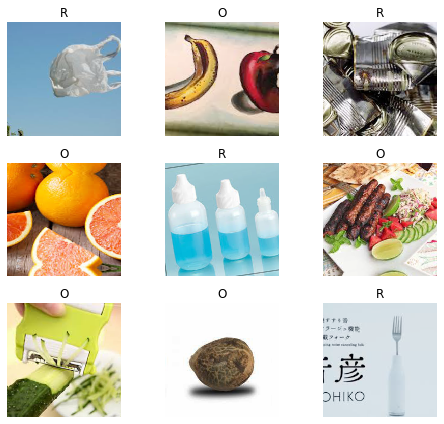

In [17]:
data.show_batch(rows=3, figsize=(7,6))

In [18]:
print(data.classes)
len(data.classes),data.c

['O', 'R']


(2, 2)

In [26]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: DataLoader worker (pid 9811) is killed by signal: Unknown signal: 0. 

In [24]:
learn.model_dir = "/DATASET/working"
learn.save('stage-1', return_path=True)

Exception: [Errno 30] Read-only file system: '/DATASET'
Can't write to '/DATASET/working', set `learn.model_dir` attribute in Learner to a full libpath path that is writable